In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/AN2DL/Homework 2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/AN2DL/Homework 2


In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [4]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

##Load and preprocess the training dataset

In [7]:
# Load training dataset
dataset = np.load("training_dataset/training_data.npy")

In [8]:
# Print dataset
print("Shape of the dataset:\t" + str(dataset.shape))
print(dataset)

Shape of the dataset:	(48000, 2776)
[[0.         0.         0.         ... 0.60277778 0.36759259 0.33148148]
 [0.         0.         0.         ... 0.6        0.46       0.396     ]
 [0.         0.         0.         ... 0.96048126 0.94650625 0.97714021]
 ...
 [0.         0.         0.         ... 0.52631579 0.58223684 0.55263158]
 [0.         0.         0.         ... 0.44559585 0.58549223 0.40414508]
 [0.         0.         0.         ... 0.54268293 0.6097561  0.59146341]]


In [9]:
# Load valid periods
valid_periods = np.load("training_dataset/valid_periods.npy")

In [10]:
# Print valid periods
print("Shape of valid periods:\t" + str(valid_periods.shape))
print(valid_periods)

Shape of valid periods:	(48000, 2)
[[2325 2776]
 [2325 2776]
 [2325 2776]
 ...
 [2676 2776]
 [2676 2776]
 [2676 2776]]


In [11]:
# Remove padding from training dataset
train_dataset = []
indexes = []

for i in range(48000):
  for j in range(valid_periods[i][0]):
    indexes.append(j)
  train_dataset.append(np.delete(dataset[i], indexes))
  indexes = []

In [12]:
# Transform list into numpy array
train_dataset = np.array(train_dataset)

In [13]:
# Save the training dataset without padding
np.save("datasets/training_no_padding", train_dataset)

In [14]:
# Reload the dataset without padding
dataset = np.load("datasets/training_no_padding.npy", allow_pickle=True)

## Visualization of the dataset

In [15]:
# Load categories dataset
categories = np.load("training_dataset/categories.npy", allow_pickle=True)

In [16]:
# Print categories
print(categories)

['D' 'D' 'D' ... 'F' 'F' 'F']


In [17]:
# Selecting and index for each category
category_indexes = []
cat = ['A', 'B', 'C', 'D', 'E', 'F']

for i in cat:
  for j in range(len(categories)):
    if categories[j] == i:
      category_indexes.append(j)
      break

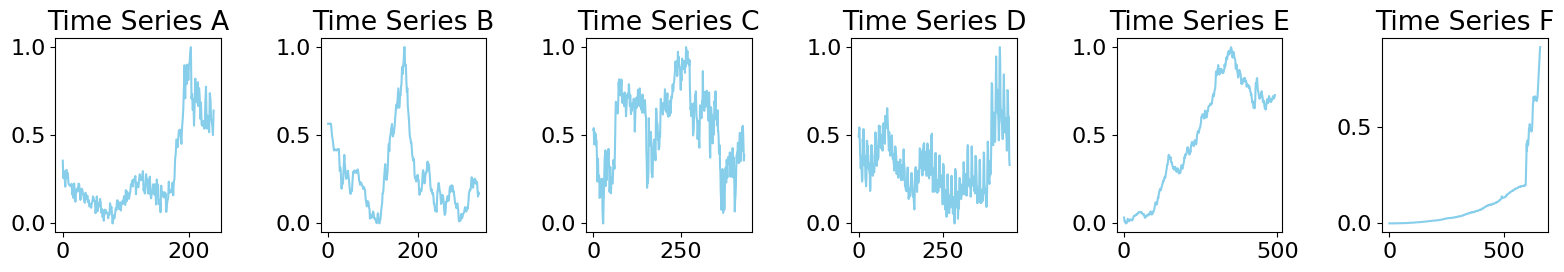

In [18]:
# Plot a time series for each category

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))

# Plot the time series for A
axes[0].plot(dataset[category_indexes[0]], color='skyblue')
axes[0].set_title('Time Series A')

# Plot the time series for B
axes[1].plot(dataset[category_indexes[1]], color='skyblue')
axes[1].set_title('Time Series B')

# Plot the time series for C
axes[2].plot(dataset[category_indexes[2]], color='skyblue')
axes[2].set_title('Time Series C')

# Plot the time series for D
axes[3].plot(dataset[category_indexes[3]], color='skyblue')
axes[3].set_title('Time Series D')

# Plot the time series for E
axes[4].plot(dataset[category_indexes[4]], color='skyblue')
axes[4].set_title('Time Series E')

# Plot the time series for F
axes[5].plot(dataset[category_indexes[5]], color='skyblue')
axes[5].set_title('Time Series F')

plt.tight_layout()
plt.show()

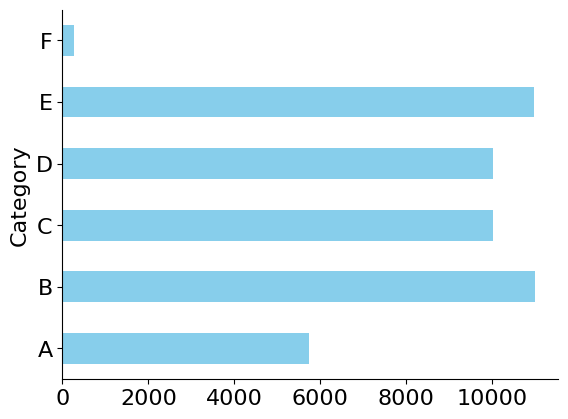

In [19]:
# Create a dataframe for the categories
df = pd.DataFrame({'Category': categories})

# Plot the number of series for each category to see if they are balanced
df.groupby('Category').size().plot(kind='barh', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)

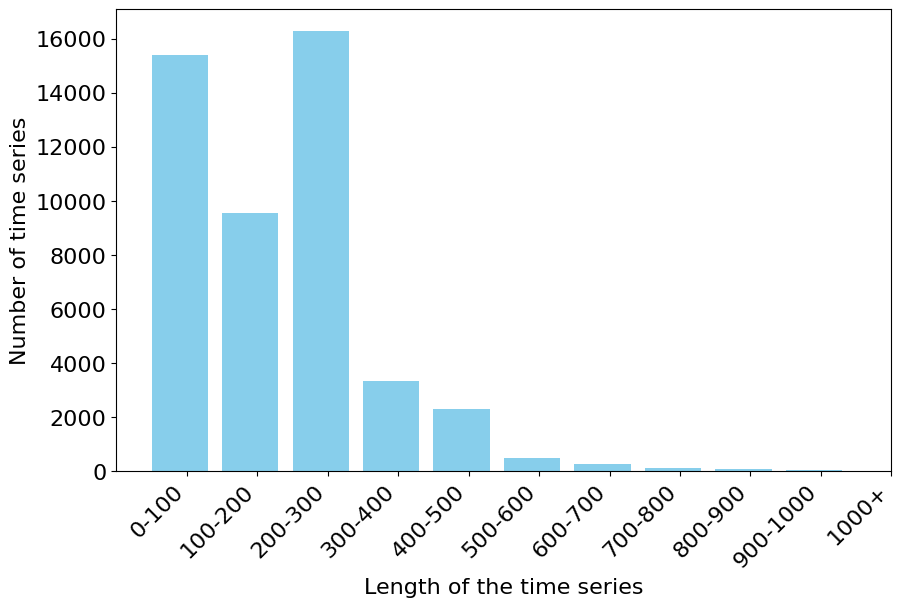

In [20]:
# Plot the number of series for each group of lengths
plt.figure(figsize=(10, 6))

len = [len(row) for row in dataset]
intervals = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]

plt.hist(len, bins=intervals, color='skyblue', width=80)

plt.xlabel('Length of the time series')
plt.ylabel('Number of time series')

xtick_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']
xtick_positions = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050]

plt.xticks(xtick_positions, xtick_labels, rotation=45, ha='right')

plt.show()